# Spaceship Titanic Survivel Prediction

#### Loading & Reading the Data

In [ ]:
#!pip install opendatasets
#!pip install pandas

In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/competitions/spaceship-titanic/data")

Skipping, found downloaded files in "./spaceship-titanic" (use force=True to force download)


In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/spaceship-titanic/train.csv')
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df2=pd.read_csv('/content/spaceship-titanic/test.csv')
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df1.shape, df2.shape

((8693, 14), (4277, 13))

In [ ]:
df1.columns, df2.columns

(Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Name', 'Transported'],
       dtype='object'),
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Name'],
       dtype='object'))

### Fill empty values

##### First thing first, merge train and test dataframes for filling empty values at once

In [ ]:
df=pd.merge(df1,df2, how='outer', on=['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'])
df.shape

(12970, 14)

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [ ]:
df['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [ ]:
df['HomePlanet'].fillna('Earth', inplace = True)   # fill null HomePlanet with HomePlanet mode

In [ ]:
df['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [ ]:
df['Destination'].fillna('TRAPPIST-1e', inplace=True) # fill null Destination with Destination mode

In [ ]:
import seaborn as sns

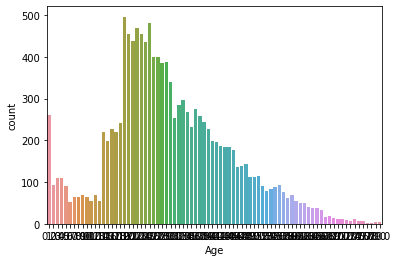

In [ ]:
sns.countplot(x=df['Age']);

In [ ]:
df['Age'].fillna(df['Age'].mean().astype('int'), inplace=True)

In [ ]:
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)

In [ ]:
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)

In [ ]:
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)

In [ ]:
df['Spa'].fillna(df['Spa'].mean(), inplace=True)

In [ ]:
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Cabin            299
Destination        0
Age                0
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 2.0+ MB


In [ ]:
import random

In [ ]:
df['CryoSleep']=df['CryoSleep'].replace('True','0')
df['CryoSleep']=df['CryoSleep'].replace('False','1')
df.loc[df['CryoSleep'].isnull(),['CryoSleep']] = random.randrange(2)
df['CryoSleep']=df['CryoSleep'].astype('int')

In [ ]:
df['VIP']=df['VIP'].replace('True','0')
df['VIP']=df['VIP'].replace('False','1')
df.loc[df['VIP'].isnull(),['VIP']] = random.randrange(2)
df['VIP']=df['VIP'].astype('int')

In [ ]:
df['HomePlanet']=df['HomePlanet'].astype('category')

In [ ]:
df['Destination']=df['Destination'].astype('category')

In [ ]:
df['Transported']=df['Transported'].replace('True','1')
df['Transported']=df['Transported'].replace('False','0')
df.loc[df['Transported'].isnull(),['Transported']] = 5
df['Transported']=df['Transported'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   12970 non-null  object  
 1   HomePlanet    12970 non-null  category
 2   CryoSleep     12970 non-null  int64   
 3   Cabin         12671 non-null  object  
 4   Destination   12970 non-null  category
 5   Age           12970 non-null  float64 
 6   VIP           12970 non-null  int64   
 7   RoomService   12970 non-null  float64 
 8   FoodCourt     12970 non-null  float64 
 9   ShoppingMall  12970 non-null  float64 
 10  Spa           12970 non-null  float64 
 11  VRDeck        12970 non-null  float64 
 12  Name          12676 non-null  object  
 13  Transported   12970 non-null  int64   
dtypes: category(2), float64(6), int64(3), object(3)
memory usage: 1.8+ MB


In [ ]:
df=df.drop(columns=['Name','Cabin','PassengerId'])

In [ ]:
df.sample()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
9163,Earth,1,TRAPPIST-1e,63.0,0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
data=pd.get_dummies(df,drop_first=True)

In [ ]:
data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,34.0,0,0.0,0.0,0.0,0.0,0.0,5,0,0,0,1
12966,0,42.0,0,0.0,847.0,17.0,10.0,144.0,5,0,0,0,1
12967,1,28.0,0,0.0,0.0,0.0,0.0,0.0,5,0,1,0,0
12968,0,28.0,0,0.0,2680.0,0.0,0.0,523.0,5,1,0,0,1


#### Train-Test Split

In [ ]:
train=data[:8693]
test=data[8693:]

In [ ]:
y=train['Transported']

In [ ]:
x=train.drop('Transported',axis=1)

In [ ]:
test=test.drop('Transported', axis=1)

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model=Sequential()
model.add(Dense(10, activation="relu"))    # 10 noron
model.add(Dense(15, activation="relu"))   # 15 noron
model.add(Dropout(0.25))
model.add(Dense(12, activation="relu"))    # 12 noron
model.add(Dense(10, activation="relu"))    # 10 noron
model.add(Dropout(0.25))
model.add(Dense(5, activation="relu"))    # 5 noron
model.add(Dense(5, activation="relu"))    # 5 noron
model.add(Dense(1, activation="sigmoid")) # 1 noron
# relu and sigmoid are activation functions
# relu gives 0 under 0 values and upper 0, gives same
# Sigmoid gives 0 or 1 
# Connects to all neurons with Dense

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x,y, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
870/870 [==============================] - 6s 4ms/step - loss: 1.6859 - accuracy: 0.6373
Epoch 2/150
870/870 [==============================] - 3s 4ms/step - loss: 0.6739 - accuracy: 0.6366
Epoch 3/150
870/870 [==============================] - 3s 4ms/step - loss: 0.6286 - accuracy: 0.6585
Epoch 4/150
870/870 [==============================] - 4s 4ms/step - loss: 0.5909 - accuracy: 0.6846
Epoch 5/150
870/870 [==============================] - 3s 3ms/step - loss: 0.5693 - accuracy: 0.7078
Epoch 6/150
870/870 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.7125
Epoch 7/150
870/870 [==============================] - 2s 2ms/step - loss: 0.5421 - accuracy: 0.7172
Epoch 8/150
870/870 [==============================] - 2s 2ms/step - loss: 0.5361 - accuracy: 0.7359
Epoch 9/150
870/870 [==============================] - 2s 2ms/step - loss: 0.5179 - accuracy: 0.7610
Epoch 10/150
870/870 [==============================] - 2s 2ms/step - loss: 0.5197 - accura

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 15)                165       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                192       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 5

In [ ]:
scores=model.evaluate(x,y)

272/272 [==============================] - 1s 1ms/step - loss: 0.4631 - accuracy: 0.7852


In [ ]:
history=model.fit(x,y,validation_split=0.20, epochs=200, batch_size=10, verbose=2)

Epoch 1/200
696/696 - 2s - loss: 0.4695 - accuracy: 0.7821 - val_loss: 0.4490 - val_accuracy: 0.7941 - 2s/epoch - 2ms/step
Epoch 2/200
696/696 - 1s - loss: 0.4732 - accuracy: 0.7741 - val_loss: 0.4496 - val_accuracy: 0.7953 - 1s/epoch - 2ms/step
Epoch 3/200
696/696 - 1s - loss: 0.4784 - accuracy: 0.7639 - val_loss: 0.4374 - val_accuracy: 0.7861 - 1s/epoch - 2ms/step
Epoch 4/200
696/696 - 1s - loss: 0.4727 - accuracy: 0.7718 - val_loss: 0.4520 - val_accuracy: 0.7959 - 1s/epoch - 2ms/step
Epoch 5/200
696/696 - 1s - loss: 0.4744 - accuracy: 0.7726 - val_loss: 0.4497 - val_accuracy: 0.7884 - 1s/epoch - 2ms/step
Epoch 6/200
696/696 - 1s - loss: 0.4725 - accuracy: 0.7775 - val_loss: 0.4408 - val_accuracy: 0.7930 - 1s/epoch - 2ms/step
Epoch 7/200
696/696 - 1s - loss: 0.4698 - accuracy: 0.7780 - val_loss: 0.4443 - val_accuracy: 0.7947 - 1s/epoch - 2ms/step
Epoch 8/200
696/696 - 1s - loss: 0.4733 - accuracy: 0.7728 - val_loss: 0.4371 - val_accuracy: 0.7890 - 1s/epoch - 2ms/step
Epoch 9/200
696/

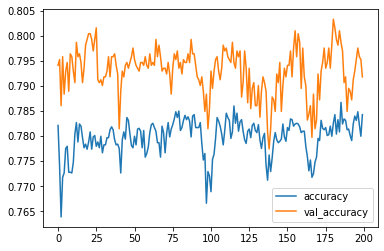

In [ ]:
plt.plot(history.history["accuracy"], label= 'accuracy')
plt.plot(history.history["val_accuracy"], label= 'val_accuracy')
plt.legend()
plt.show();

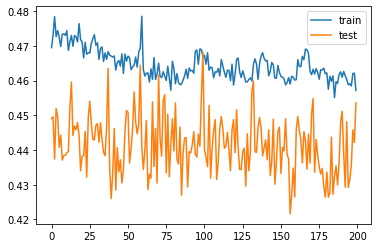

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Prediction

In [ ]:
test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
8693,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
8694,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,0,0,1
8695,1,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
8696,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,0,0,1
8697,0,20.0,0,10.0,0.0,635.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,34.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
12966,0,42.0,0,0.0,847.0,17.0,10.0,144.0,0,0,0,1
12967,1,28.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
12968,0,28.0,0,0.0,2680.0,0.0,0.0,523.0,1,0,0,1


In [ ]:
y_preds = model.predict(test).round().astype('int')
submission = pd.DataFrame({
    'PassengerId': df2.PassengerId,
    'Transported': y_preds[:,0],
})
submission.Transported=submission.Transported
a={0: "False",
   1: "True"}
submission.Transported=submission.Transported.map(a)
submission.to_csv('Spaceship-Titanic-predict.csv', index=False)

134/134 [==============================] - 0s 1ms/step


In [ ]:
predictions=pd.read_csv('Spaceship-Titanic-predict.csv')

In [ ]:
predictions.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
predictions.Transported.value_counts()

True     2265
False    2012
Name: Transported, dtype: int64